# Speed Dating Dataset Machine Learning - Supervised Learning

### Brief Dataset Summary

This dataset was gathered from individuals participating in 21 speed dating events from 2002-2004. During these events, the attendees would have 4 minutes with each participant of the opposite sex. After each of the 4 minute rounds, the participants would be asked to rate the other participant on the following attributes: attractiveness, sincerity, intelligence, fun, ambition, and shared interests. In addition, this dataset includes answers from a questionnaire that the participants had to fill out at different times which include demographics, dating habits, preferences/opinions and lifestyle. Ultimately, these participants decide if they would like to see their date again or not. 

### Project Topic: Explanation

For this project, I would like to predict whether or not the two people matched based off their rating of their date. This will be done using supervised machine learning, specifically using a classification task. I would like to use multiple supervised machine learning methods such as decision tree, random forest, gradient boosting, and naive bayesian classification. The accuracy rate of each of these methods will be compared and the best method will be chosen.

### Project Topic: Goal

This project will reveal what the most important attributes that people look for are when looking for their significant other. This research can improve the matchmaking process. If we are able to build a model that predicts whether or not two people will be a match, we can create a couple matching algorithm that can match people online.

# need to fix the goal ^^^^^^^

### Data: Source

The following data is from a single source (Columbia Business School) who gathered the data via multiple questionnaires filled out at different times by the participants.

Fisman, R., Lyengar, S. (2004). *Speed Dating Data* [Data Set]. Columbia Business School.         https://www.openml.org/search?type=data&sort=runs&id=40536&status=active.

### Loading the Data:

In [1]:
conda install pandoc

Channels:
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pandoc


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandoc-2.12                |       hecd8cb5_3        12.1 MB
    ------------------------------------------------------------
                                           Total:        12.1 MB

The following NEW packages will be INSTALLED:

  pandoc             pkgs/main/osx-64::pandoc-2.12-hecd8cb5_3 



                                                                                
Preparing transaction: done
Verifying transaction: | WARNING conda.core.path_actions:verify(1050): Unable to create environments file. Path not writable.
  environment location: /Users/youanahabib/.conda/environments.txt

done
Executing transaction: done

Note: you may need to restart the kernel to 

In [177]:
#installing needed package
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
#loading the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB

In [3]:
SpeedDating = pd.read_csv("SpeedDatingData.csv", encoding='latin1')

In [4]:
SpeedDating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
SpeedDating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [6]:
print(SpeedDating.shape)

(8378, 195)


### Data: Description

8378 samples(rows), 195 features (columns)

Data types of the columns:
- 174 float64
- 13 int64
- 8 object

Of the 195 features, 22 of them were categorical and 173 of them were numerical. 
- Of the 22 categorical features, 9 of them were binary, 13 of them were ordinal, and none of them were ordinal. 
- Of the 173 numerical features, 41 of them were discrete and 132 of them were continuous.

(see below)

Categorical:
- **Binary:** 'gender', 'condtn', 'match', 'samerace', 'dec_o', 'met_o', 'dec', 'met', 'date_3', 

- **Ordinal:**

- **Nominal:** 'race_o', 'field', 'field_cd', 'undergra', 'race', 'from', 'zipcode', 'goal', 'date', 'go_out', 'career', 'career_c', 'length', 

Numberical:
- **Discrete:** 'iid', 'id', 'idg', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'age_o', 'age', 'mn_sat', 'imprace', 'imprelig', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'match_es', 'satis_2', 'numdat_2', 'you_call', 'them_cal', 'numdat_3', 'num_in_3', 

- **Continuous:** 'int_corr', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'tuition', 'income', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'

#### Attribute Description: 
##### (Due to having 195 attributes, condensed descriptions are listed below - some will be removed later on)
- 'iid' = Unique subject number 
- 'id' = Subject number within wave
- 'gender' = Gender of the participant (F = 0, M = 1)
- 'idg' = Subject number within gender
- 'condtn' = Number of choices (limited = 1, extensive = 2)
- 'wave' = Speed dating event number
- 'round' = Round number
- 'position'/'positin1' = Station number where individual met partner/station number hwere individual started
- 'order' = The number of date that night when met partner
- 'partner' = Partner's id number the night of event
- 'pid' = Partner's iid number
- 'match' = Match or not (no match = 0, match = 1)
- 'int_corr' = Correlation between participant’s and partner’s ratings of interests at Time 1**
- 'samerace' = Participant and partner were of the same race (yes = 1, no = 1)
- 'age_o' = Age of partner
- 'race_o' = Race of partner (Black/African American=1, European/Caucasian-American=2, Latino/Hispanic American=3, Asian/Pacific Islander/Asian-American=4, Native American=5, Other=6)
- 'pf_o_attribute' = partner’s stated preference at Time 1 (attr1_1) for all 6 attributes ------------
- 'dec_o' = decision of partner the night of event (match = 1, no match = 0)
- 'attribute_o' = rating by partner the night of the event for all 6 attributes
- 'like_o' = Partner rating on how they liked the participant
- 'prob_o' = Partner rating on if they think the participant liked them
- 'met_o' = Has the partner met the participant before (yes = 1, no = 0)
- 'age' = Age of the participant
- 'field' = Field of Study
- 'field_cd' = Field of Study Coded (Law = 1, Math = 2, ..., Other = 18)
- 'undergra' = School attended for undergrad
- 'mn_sat' = Median SAT score for the undergraduate institution they attended
- 'tuition' = Tuition of their undergraduate institution
- 'race' = Race of the participant
- 'imprace' = How important is it that partner is of same race?
- 'imprelig' = How important is it that partner is of same religion?
- 'from' = Where is the participant from originally?
- 'zipcode' = What is the zipcode of the area the participant grew up on?
- 'income' = Median household income based on zipcode
- 'goal' = Primary goal in participating in this event (coded)
- 'date' = How frequently the participant goes on dates (coded)
- 'go_out' = How often do you go out, not necessarily on dates (coded)
- 'career' = Intended career
- 'career_c' = Career (coded)
- 'sports', 'tvsports', ... 'yoga' = How interested are you in the following activities
- 'exphappy' = How happy do you expect to be with the people you meet during the event?
- 'expnum' = How many people do you expect to be interested in you?
- 'attr1_1' = Participants rating of the importance of the following attributes in a potential date of theirs at time 1
- 'attr4_1' = Participants rating what they think is the importance of the following attributes in a potential date of members of the same gender at time 1
- 'attr2_1' = Participants rating what they think is the importance of the following attributes in a potential date of members of the opposite gender at time 1
- 'attr3_1' = Participants rating of the following attributes of how they see themselves at time 1
- 'attr5_1' = Participants rating of the following attributes of how they think others will see them at time 1
- 'dec' = Participants decision of their partner (yes = 1, no = 0)
- 'attribute' = Participant's rating of their partner in the following attributes
- 'like' = Participant's rating on how they liked their partner?
- 'prob' = Participant's rating on if they think their partner liked them
- 'met' = Has the participant met their partner before (yes = 1, no = 0)
- 'match_es' = How many matches the participant expected themselves to get
- 'attr1_s' = Participants rating of the importance of the following attributes in a potential date of theirs halfway through the night
- 'attr3_s' = Participants rating of the following attributes of how they see themselves halfway through the night
- 'satis_2' = Rating of how satisfied the participants were with the people they met at time 2
- 'length' = Rating of the length of 4 minutes per date (too little = 1, too much = 2, just right = 3)
- 'numdat_2' = Rating of the number of the dates they had (too little = 1, too much = 2, just right = 3)
- 'attr7_2' = Participants rating the importance of the following attributes in their decision at time 2
- 'attr1_2' = Participants rating what they they look for in terms of the following attributes at time 2
- 'attr4_2' = Participants rating what they think is the importance of the following attributes in a potential date of members of the same gender at time 2
- 'attr2_2' = Participants rating what they think is the importance of the following attributes in a potential date of members of the opposite gender at time 2
- 'attr3_2' = Participants rating of the following attributes of how they see themselves at time 2
- 'attr5_2' = Participants rating of the following attributes of how they think others will see them at time 2
- 'you_call' = Of your matches, how many have you called to set up a date
- 'them_call' = Of your matches, how many have called you to set up a date
- 'date_3' = Have you been on a date with any of your matches (yes = 1, no = 0)
- 'num_in_3' = How many of your matches have you been on a date with
- 'attr1_3' = Participants rating what they look for in terms of the following attributes in a potential date of theirs at time 3
- 'attr7_3' = Participants rating the reflection of the actual importance of the following attributes in their decision at time 3
- 'attr4_3' = Participants rating what they think is the importance of the following attributes in a potential date of members of the same gender at time 3
- 'attr2_3' = Participants rating what they think is the importance of the following attributes in a potential date of members of the opposite gender at time 2
- 'attr3_3' = Participants rating of the following attributes of how they see themselves at time 3
- 'attr5_3' = Participants rating of the following attributes of how they think others will see them at time 3

** Times:
- Time 1 = At the time of sign up
- Time 2 = The day of the event after participation
- Time 3 = 3-4 weeks after being given their matches

The data above is from a single table published by Columbia Business School.

### Data Cleaning:

In [7]:
pd.set_option('display.max_columns', None)

print(SpeedDating.head())

# Optionally, reset the display options to default
pd.reset_option('display.max_columns')

   iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0        1  11.0      0      0.14         0   27.0     2.0      35.0   
1        2  12.0      0      0.54         0   22.0     2.0      60.0   
2        3  13.0      1      0.16         1   22.0     4.0      19.0   
3        4  14.0      1      0.61         0   23.0     2.0      30.0   
4        5  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
0      20.0      20.0      20.0 

In [8]:
print(SpeedDating.head())

   iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN 

In [9]:
#fixing 'income' column to make it more easily readable
SpeedDating['income'] = SpeedDating['income'].astype(str)
SpeedDating['income'] = SpeedDating['income'].str.replace(',', '')
SpeedDating['income'] = SpeedDating['income'].astype(float)

In [10]:
print(SpeedDating['income'].unique())

[ 69487.  65929.     nan  37754.  86340.  60304.  54620.  48652.  29237.
  56580.  36782.  38548.  52010.  28418.  43185.  23152.  43664.  48441.
  61152.  36485.  41507.  17134.  30038.  33772.  24997.  42096.  28891.
  62635.  12063.  29809.  26482.  30147.  39919.  41466.  23988.  28989.
  50948.  38022.  47559.  53539.  32159.  53940.  40753.  38207.  46166.
  30973.  28317.  26645.  25589.  55223. 109031.  40409.  21597.  76624.
  35968.  51725.  55419.  55550.  26682.  41547.  23361.  74893.  52804.
  53923.  27094.  57213.  42390.  43636.  57887.  30768.  66699.  45360.
  55080.  17378.  40375.  48929.  78193.  63351.  50745.  29279.  38774.
  58802.  41831.  52186.  97857.  74624.  21590.  38832.  37248.  28240.
  53771.  56096.  31560.  52467.  80006.  47572.  22439.  31383.  40749.
  47997.  78704.  31143.  32129.  44195.  46837.  97972.  35960.  65708.
  49466.  53229.  32649.  35867.  40244.  42640.  52388.  62875.  30855.
  46800.  45695.  46792.  53501.  64716.  27248.  2

In [11]:
#Checking for columns that are NaN for over half of the cells
nan_count = SpeedDating.isna().sum()

nan = []
for col, value in nan_count.items():
    if value > (SpeedDating.shape[0] / 2):
        nan.append((col, value)) 
    
#The columns in nan have too many missing values to be useful, therefore they will be deleted
for col, value in nan:
    SpeedDating = SpeedDating.drop(columns = [col])
    
#Checking shape to ensure proper deletion
print(SpeedDating.shape)

(8378, 136)


In [12]:
#Checking for rows that are NaN for over half of the cells
row_nan_count = SpeedDating.isna().sum(axis=1)
print(row_nan_count)

row_nan = []
for col, value in row_nan_count.items():
    if value > (SpeedDating.shape[1] / 2):
        nan.append((col, value)) 

print(row_nan)

#There are no rows with an excessive amount of NaN values

0       31
1       31
2       32
3       31
4       31
        ..
8373     4
8374     2
8375     3
8376     2
8377     2
Length: 8378, dtype: int64
[]


In [13]:
# #viewing NaN values in each column
# nan_count = SpeedDating.isna().sum()
# list1 = list(SpeedDating.columns)
# list2 = list(nan_count)

# zipped = zip(list1, list2)

# zipped_list = list(zipped)
# print(zipped_list)

In [14]:
#Following features are irrelevant to the problem we are trying to solve therefore we will remove them
irrelevant = ['iid', 'id', 'idg', 'position', 'positin1', 'partner', 'pid']

#Features in 'redundant' list are redundant: explained in "Data Cleaning Conclusions/Discussions"
redundant = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
             'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'field', 
             'career', 'undergra', 'from', 'zipcode']

#The following list contains information that suggests whether the individuals matched or not therefore they will be removed
spoiler = ['dec_o', 'like_o', 'dec', 'like']


remove = irrelevant + redundant + spoiler
for col in remove:
    SpeedDating = SpeedDating.drop(columns = [col])

print(SpeedDating.shape)

print(list(SpeedDating.columns))

(8378, 103)
['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career_c', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'i

#### Data Cleaning Conclusions/Discussions

While performing data cleaning, I found that this dataset has a lot of missing values. I chose to delete the columns that had NaN for over half their cells since they have too many missing values for the data to be imputed. I repeated this process for the rows, but no rows had NaN for over half their cells. 

To further clean the data, I removed some features for a few different reasons. First, I removed features that, according to my domain knowledge, are irrelevant to the problem. This included ID numbers for both the participant and their partner, and which table they were sitting at. As this will not affect whether or not the two are matched, I removed those features. Second, I chose to remove features that I found to be redundant (information that is found in another feature). This included 17 features (sports, tvsports, exercise, ..., shopping, yoga) that gaged the participant's interest in each of the features. This information was gathered to calculate how much in common the participant had with their partner which is quantified in the 'int_corr' feature. For that reason, I knew this information was redundant and therefore I chose to remove them altogether. Some features were redundant since they were later on coded using a number. For example, 'field' contains the individual's field of study while 'field_cd' is a number coded version of the same information. The same thing occurred with 'career' and 'career_c'. In addition, some features were included since they were used to calculate another feature. An example of this was the 'undergra' feature, which contained the individual's undergraduate university, that was used to estimate their intelligence based off the school's median SAT. Same goes for 'from' and 'zipcode' that were used to estimate salary. Third, I removed features that suggested whether the individuals matched or not such as 'like' and 'like_o' where the participant rated their partner and viceversa and 'dec' and 'dec_o' which held the decisions of each of the individuals. 

Due to the largeness of the dataset, more cleaning will be performed later. I would like to create some visualizations of the data before I remove more features.

<Axes: xlabel='match'>

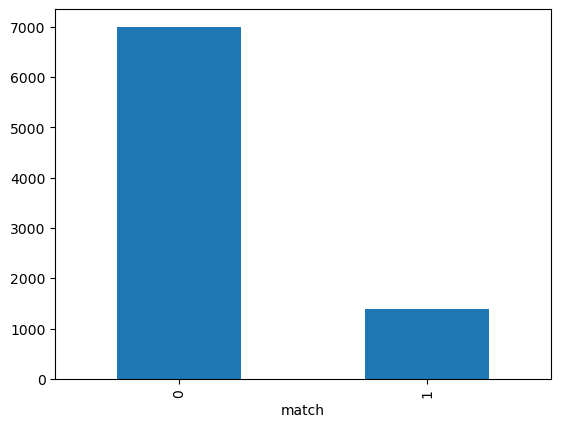

In [15]:
SpeedDating['match'].value_counts().plot(kind='bar')

Using this visualization, we can see the data is imbalanced. For this reason, accuracy might not be the best metric to use when evaluating models.

### Exploratory Data Analysis

Correlation Analysis: Done on select features (based on intuition) since there are too many 

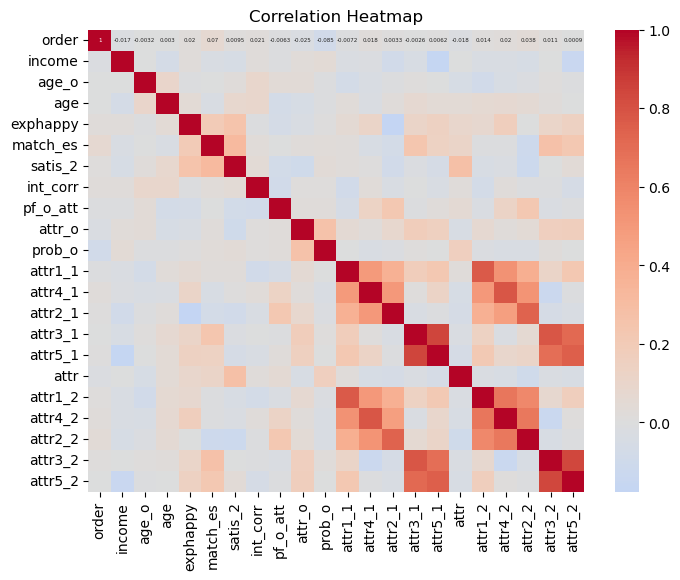

In [16]:
att_for_corr = ['order', 'income', 'age_o', 'age', 'exphappy', 'match_es', 'satis_2', 'int_corr', 'pf_o_att', 'attr_o', 'prob_o', 'attr1_1', 'attr4_1', 'attr2_1', 'attr3_1', 'attr5_1', 'attr', 'attr1_2', 'attr4_2', 'attr2_2', 'attr3_2', 'attr5_2']

df1 = SpeedDating[att_for_corr]

corr_mat = df1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, annot_kws={"size": 4}, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

From the heatmap above depicting the correlation matrix, we can see that there is a correlation between a few sets of features:
- attr1_1, attr4_1, and attr2_1
- attr1_2, attr4_2, and attr2_2
- attr3_1 and attr5_1
- attr3_2 and attr5_2

We will try to eliminate correlated features by keeping one for each set and deleting the rest. 

Between attr1_1, attr4_1, and attr2_1, intuition says that attr1_1 (participants' rating of the importance of the following attributes in a potential date of theirs at time 1) is more relevant to the problem than the other two. The next set (attr1_2, attr4_2, and attr2_2) follows the same logic and attr 1_2 (...at time 2) will be kept.

To decide between attr3_1 and attr5_1 (and attr3_2 and attr5_2), addition testing is needed since intuition does not tell us much.

In [17]:
#point biserial correlation is used to measure the relationship between a binary and a continuous variable
#this method will be used to determine if attr3_1 or attr5_1 is a better feature to determine 'match' (goal feature)

a = SpeedDating['attr3_1']
b = SpeedDating['match']

mask = ~np.isnan(a) & ~np.isnan(b)
a_clean = a[mask]
b_clean = b[mask]

# Now calculate the point-biserial correlation
correlation, p_value = stats.pointbiserialr(a_clean, b_clean)

print("Point-biserial correlation:", correlation)
print("P-value:", p_value)

c = SpeedDating['attr5_1']
d = SpeedDating['match']

mask = ~np.isnan(c) & ~np.isnan(d)
c_clean = c[mask]
d_clean = d[mask]

# Now calculate the point-biserial correlation
correlation, p_value = stats.pointbiserialr(c_clean, d_clean)

print("Point-biserial correlation:", correlation)
print("P-value:", p_value)

Point-biserial correlation: 0.03643889625441256
P-value: 0.0009166362430136582
Point-biserial correlation: 0.0027897208170439376
P-value: 0.845118511734626


Between attr3_1 and attr5_1, a point-biserial correlation was performed between each attribute and the target feature. A high point-biserial correlation reveals that the attribute may have good predictive power for the target. The point-biserial correlation for attr3_1 was higher than that of attr5_1. In addition, the p-value for attr3_1 indicated that this correlation coefficient is significant while the p-value for for attr5_1 indicated that it might be due to chance. For those reasons, attr3_1 will be selected over attr5_1. Same reasoning goes for attr3_2 and attr5_2.

Here, an assumption is made that all attributes follow the same pattern. Therefore for all 6 attributes, attribute1_1 will be selected over attribute4_1 and attribute2_1, attribute1_2 will be selected over attribute4_2 and attribute2_2, attribute3_1 will be selected over attribute5_1, and attribute3_2 will be selected over attribute5_2.

In [18]:
remove = ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 
          'fun2_1', 'amb2_1', 'shar2_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr4_2', 
          'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 
          'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']

for col in remove:
    SpeedDating = SpeedDating.drop(columns = [col])

Boxplot:

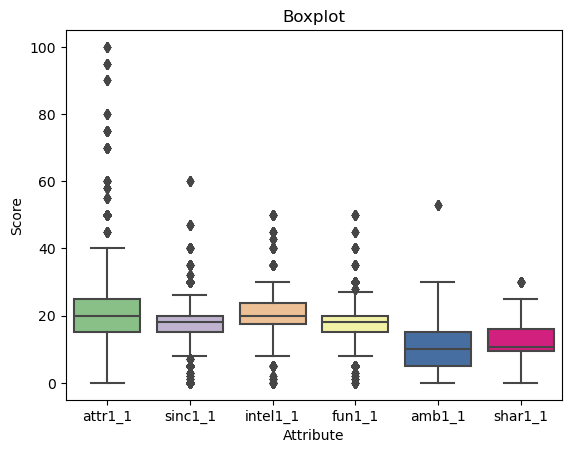

In [20]:
melted_data = SpeedDating[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].melt(var_name='Attribute', value_name='Score')

sns.boxplot(x='Attribute', y='Score', data=melted_data, palette='Accent')

plt.title('Boxplot')

plt.show()

Based off this boxplot, we can see that people tend to say they prefer an attractive and intellectual individual when looking for a partner. This is followed by sincere and fun. Ambition and shared interests are said to be less influential in their decision.

### Models

Feature Engineering to help models deal with categorial data:

In [197]:
SpeedDating['race_o'] = SpeedDating['race_o'].map({1: 'Black', 2: 'White', 3: 'Latino', 4: 'Asian', 
                                                   5: 'NativeAmerican', 6: 'Other'})

# Apply One-Hot Encoding
SpeedDating = pd.get_dummies(SpeedDating, columns=['race_o'], drop_first=False)

print(list(SpeedDating.columns))

['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career_c', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'race_o_Asian', 'race_o_Black', 'race_o_Latino', 'race_o_Other', 'race_o_White']


In [198]:
SpeedDating['field_cd'] = SpeedDating['field_cd'].map({1: 'Law', 2: 'Math', 3: 'SocSci', 4: 'Medical', 
                                                       5: 'Engineering', 6: 'English', 7: 'History', 8: 'Business', 
                                                      9: 'Education', 10: 'Science', 11: 'SocWork', 12: 'Undergrad', 
                                                      13: 'PolSci', 14: 'Film', 15: 'FineArts', 16: 'Languages', 
                                                      17: 'Architecture', 18: 'Other', })

# Apply One-Hot Encoding
SpeedDating = pd.get_dummies(SpeedDating, columns=['field_cd'], drop_first=False)

print(list(SpeedDating.columns))

['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career_c', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'race_o_Asian', 'race_o_Black', 'race_o_Latino', 'race_o_Other', 'race_o_White', 'field_cd_Architecture', 'field_cd_Business', 'field_cd_Education', 'field_cd_Engineering', 'field_cd_English', 'field_cd_Film', 'field_cd_FineArts', 'field_cd_History', 'field_cd_Languages', 'field_cd_Law', 'field_cd_Math', 'field_cd_Me

In [199]:
SpeedDating['race'] = SpeedDating['race'].map({1: 'Black', 2: 'White', 3: 'Latino', 4: 'Asian', 5: 'NativeAmerican', 6: 'Other'})

# Apply One-Hot Encoding
SpeedDating = pd.get_dummies(SpeedDating, columns=['race'], drop_first=False)

print(list(SpeedDating.columns))

['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career_c', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'race_o_Asian', 'race_o_Black', 'race_o_Latino', 'race_o_Other', 'race_o_White', 'field_cd_Architecture', 'field_cd_Business', 'field_cd_Education', 'field_cd_Engineering', 'field_cd_English', 'field_cd_Film', 'field_cd_FineArts', 'field_cd_History', 'field_cd_Languages', 'field_cd_Law', 'field_cd_Math', 'field_cd_Medical', 

In [200]:
SpeedDating['goal'] = SpeedDating['goal'].map({1: 'FunNight', 2: 'MeetPpl', 3: 'Date', 4: 'SerRel', 5: 'SayIDid', 6: 'Other'})

# Apply One-Hot Encoding
SpeedDating = pd.get_dummies(SpeedDating, columns=['goal'], drop_first=False)

print(list(SpeedDating.columns))

['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'date', 'go_out', 'career_c', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'race_o_Asian', 'race_o_Black', 'race_o_Latino', 'race_o_Other', 'race_o_White', 'field_cd_Architecture', 'field_cd_Business', 'field_cd_Education', 'field_cd_Engineering', 'field_cd_English', 'field_cd_Film', 'field_cd_FineArts', 'field_cd_History', 'field_cd_Languages', 'field_cd_Law', 'field_cd_Math', 'field_cd_Medical', 'field_c

In [201]:
SpeedDating['date'] = SpeedDating['date'].map({1: 'SevpW', 2: '2pW', 3: '1pW', 4: '2pM', 5: '1pM', 6: 'SevpY', 7: 'Rare'})

# Apply One-Hot Encoding
SpeedDating = pd.get_dummies(SpeedDating, columns=['date'], drop_first=False)

print(list(SpeedDating.columns))

['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'go_out', 'career_c', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'race_o_Asian', 'race_o_Black', 'race_o_Latino', 'race_o_Other', 'race_o_White', 'field_cd_Architecture', 'field_cd_Business', 'field_cd_Education', 'field_cd_Engineering', 'field_cd_English', 'field_cd_Film', 'field_cd_FineArts', 'field_cd_History', 'field_cd_Languages', 'field_cd_Law', 'field_cd_Math', 'field_cd_Medical', 'field_cd_Other'

In [202]:
SpeedDating['go_out'] = SpeedDating['go_out'].map({1: 'SevpW', 2: '2pW', 3: '1pW', 4: '2pM', 5: '1pM', 6: 'SevpY', 7: 'Rare'})

# Apply One-Hot Encoding
SpeedDating = pd.get_dummies(SpeedDating, columns=['go_out'], drop_first=False)

print(list(SpeedDating.columns))

['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'career_c', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'race_o_Asian', 'race_o_Black', 'race_o_Latino', 'race_o_Other', 'race_o_White', 'field_cd_Architecture', 'field_cd_Business', 'field_cd_Education', 'field_cd_Engineering', 'field_cd_English', 'field_cd_Film', 'field_cd_FineArts', 'field_cd_History', 'field_cd_Languages', 'field_cd_Law', 'field_cd_Math', 'field_cd_Medical', 'field_cd_Other', 'field_c

In [203]:
SpeedDating['career_c'] = SpeedDating['career_c'].map({1: 'Law', 2: 'Academic', 3: 'Psych', 4: 'Medicine', 
                                                       5: 'Engineer', 6: 'Arts', 7: 'Finance', 8: 'RealEstate', 
                                                      9: 'Affairs', 10: 'Undec', 11: 'SocWork', 12: 'SpeechPath', 
                                                      13: 'Politics', 14: 'ProAthl', 15: 'Other', 16: 'Journalism', 
                                                      17: 'Architecture'})

# Apply One-Hot Encoding
SpeedDating = pd.get_dummies(SpeedDating, columns=['career_c'], drop_first=False)

print(list(SpeedDating.columns))

['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'race_o_Asian', 'race_o_Black', 'race_o_Latino', 'race_o_Other', 'race_o_White', 'field_cd_Architecture', 'field_cd_Business', 'field_cd_Education', 'field_cd_Engineering', 'field_cd_English', 'field_cd_Film', 'field_cd_FineArts', 'field_cd_History', 'field_cd_Languages', 'field_cd_Law', 'field_cd_Math', 'field_cd_Medical', 'field_cd_Other', 'field_cd_PolSci', '

In [204]:
SpeedDating['length'] = SpeedDating['length'].map({1: 'little', 2: 'much', 3: 'right'})

# Apply One-Hot Encoding
SpeedDating = pd.get_dummies(SpeedDating, columns=['length'], drop_first=False)

print(list(SpeedDating.columns))

['gender', 'condtn', 'wave', 'round', 'order', 'match', 'int_corr', 'samerace', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob', 'met', 'match_es', 'satis_2', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'race_o_Asian', 'race_o_Black', 'race_o_Latino', 'race_o_Other', 'race_o_White', 'field_cd_Architecture', 'field_cd_Business', 'field_cd_Education', 'field_cd_Engineering', 'field_cd_English', 'field_cd_Film', 'field_cd_FineArts', 'field_cd_History', 'field_cd_Languages', 'field_cd_Law', 'field_cd_Math', 'field_cd_Medical', 'field_cd_Other', 'field_cd_PolSci', 'field_cd_S

Data Splitting into training and testing

In [205]:
x = SpeedDating.drop(columns = 'match')
y = SpeedDating['match']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20, shuffle=True)

XGBClassifier:

In [206]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print("Accuracy:", accuracy_XGB)

Accuracy: 0.8854415274463007


Many classifiers cannot deal with NaN... so what if we try an imputer

In [207]:
imputer = SimpleImputer(strategy='mean')
SpeedDating_imputed = imputer.fit_transform(SpeedDating)
SpeedDating_imputed = pd.DataFrame(SpeedDating_imputed, columns=SpeedDating.columns)

In [208]:
x_imp = SpeedDating_imputed.drop(columns = 'match')
y_imp = SpeedDating_imputed['match']

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(x_imp, y_imp, random_state=0, test_size=0.20, shuffle=True)

Decision Tree:

In [231]:
DT_clf = DecisionTreeClassifier(random_state = 0)

DT_clf = DT_clf.fit(X_train_imp, y_train_imp)

y_pred_DT = DT_clf.predict(X_test_imp)

accuracy_DT = accuracy_score(y_test_imp, y_pred_DT)
print("Accuracy:", accuracy_DT)

Accuracy: 0.7935560859188544


Naive Bayesian Classifier:

In [232]:
GNB = GaussianNB()

GNB.fit(X_train_imp, y_train_imp)

y_pred_GNB = GNB.predict(X_test_imp)

accuracy_GNB = accuracy_score(y_test_imp, y_pred_GNB)
print("Accuracy:", accuracy_GNB)

Accuracy: 0.7750596658711217


Random Forest:

In [273]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train_imp, y_train_imp)
y_pred_rf = rf.predict(X_test_imp)

accuracy_rf = accuracy_score(y_test_imp, y_pred_rf)
print("Accuracy:", accuracy_rf)

feature_importances = rf.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

column_names = [x_imp.columns[i] for i in sorted_indices]

print(column_names)

Accuracy: 0.8597852028639618
['fun', 'attr_o', 'attr', 'fun_o', 'prob_o', 'shar_o', 'shar', 'prob', 'int_corr', 'order', 'pf_o_att', 'pf_o_sha', 'pf_o_int', 'pf_o_sin', 'age_o', 'pf_o_fun', 'pf_o_amb', 'match_es', 'sinc_o', 'intel', 'intel_o', 'income', 'amb_o', 'sinc', 'attr1_1', 'amb', 'shar1_1', 'age', 'intel1_1', 'fun1_1', 'wave', 'attr1_2', 'round', 'amb1_1', 'sinc1_1', 'intel1_2', 'amb1_2', 'shar1_2', 'fun1_2', 'sinc1_2', 'satis_2', 'amb3_2', 'exphappy', 'imprelig', 'amb3_1', 'fun3_2', 'imprace', 'sinc3_2', 'attr3_1', 'sinc3_1', 'attr3_2', 'fun3_1', 'intel3_2', 'met_o', 'intel3_1', 'met', 'numdat_2', 'race_o_White', 'race_o_Asian', 'samerace', 'go_out_SevpW', 'career_c_Finance', 'goal_FunNight', 'date_2pM', 'go_out_2pW', 'length_right', 'field_cd_Business', 'go_out_1pW', 'date_SevpY', 'goal_MeetPpl', 'race_White', 'condtn', 'length_little', 'race_o_Latino', 'field_cd_Medical', 'career_c_Academic', 'race_o_Other', 'race_Asian', 'gender', 'field_cd_SocSci', 'race_Latino', 'date_1pM

Hyperparameter Tuning for Random Forest:

In [215]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf_param_selection = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf_param_selection, param_distributions = param_dist, n_iter=10, scoring = 'accuracy', cv=5, random_state = 0)

# Fit the random search object to the data
rand_search.fit(X_train_imp, y_train_imp)

best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 138}


In [235]:
rf_optimized = RandomForestClassifier(max_depth = rand_search.best_params_['max_depth'], n_estimators = rand_search.best_params_['n_estimators'], random_state = 0)
rf_optimized.fit(X_train_imp, y_train_imp)
y_pred_rfopt = rf_optimized.predict(X_test_imp)

accuracy_rfopt = accuracy_score(y_test_imp, y_pred_rfopt)
print("Accuracy:", accuracy_rfopt)

Accuracy: 0.8633651551312649


### Results and Analysis

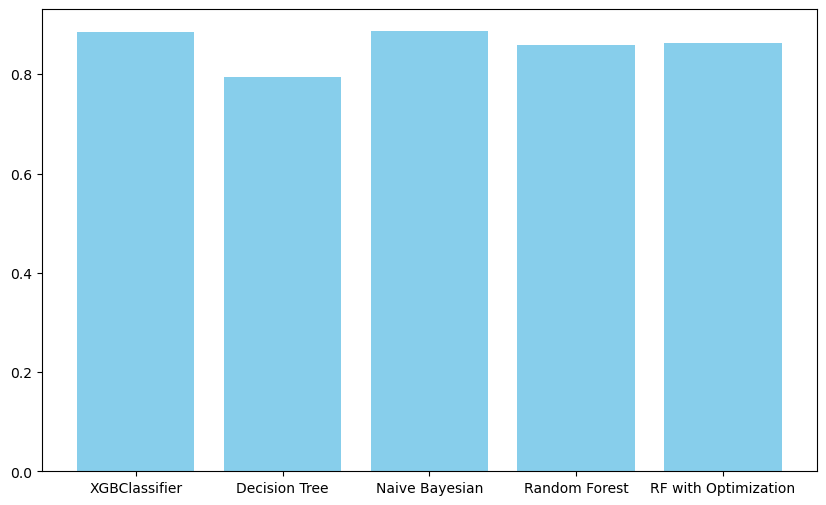

In [221]:
#Graph of the accuracies:
model_accuracies = {
    'XGBClassifier': accuracy_XGB,
    'Decision Tree': accuracy_DT,
    'Naive Bayesian': accuracy_GNB,
    'Random Forest': accuracy_rf,
    'RF with Optimization': accuracy_rfopt
}

models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')

plt.show()

Using the graph above, we can see that XGBClassifier and Naive Bayesian were the models that performed the best according to accuracy. Since the data is imbalanced in its target feature, we will confirm this using a different evaluation metric.

Calculating precision score

In [248]:
precision_XGB = precision_score(y_test, y_pred_XGB)

print("Precision:", precision_XGB)

Precision: 0.7081081081081081


In [249]:
y_pred_DT = DT_clf.predict(X_test_imp)

precision_DT = precision_score(y_test_imp, y_pred_DT)
print("Precision:", precision_DT)

Precision: 0.36200716845878134


In [250]:
y_pred_GNB = GNB.predict(X_test_imp)

precision_GNB = precision_score(y_test_imp, y_pred_GNB)
print("Precision:", precision_GNB)

Precision: 0.3911290322580645


In [251]:
y_pred_rf = rf.predict(X_test_imp)

precision_rf = precision_score(y_test_imp, y_pred_rf)
print("Precision:", precision_rf)

Precision: 0.7297297297297297


In [252]:
y_pred_rfopt = rf_optimized.predict(X_test_imp)

precision_rfopt = precision_score(y_test_imp, y_pred_rfopt)
print("Precision:", precision_rfopt)

Precision: 0.7702702702702703


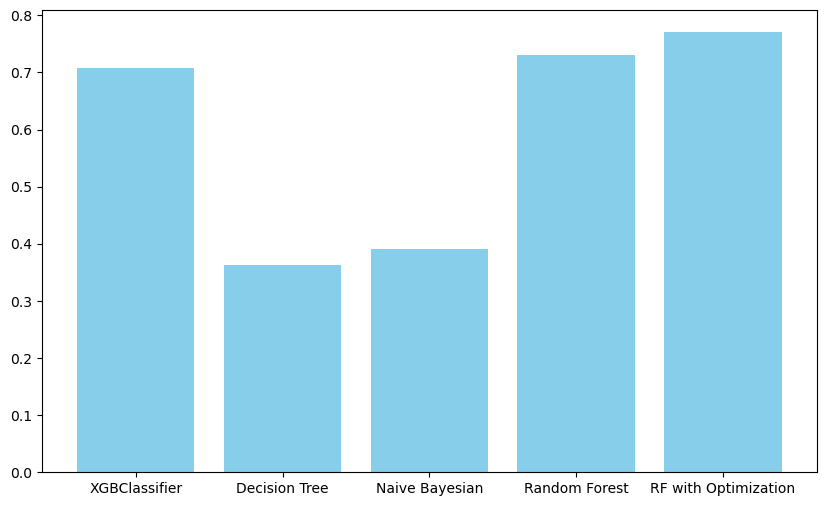

In [254]:
#Graph of the precision scores:
model_precision = {
    'XGBClassifier': precision_XGB,
    'Decision Tree': precision_DT,
    'Naive Bayesian': precision_GNB,
    'Random Forest': precision_rf,
    'RF with Optimization': precision_rfopt
}

models = list(model_precision.keys())
precisions = list(model_precision.values())

plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color='skyblue')

plt.show()

#### Results Summary:

Since the goal of this project is to use the knowledge gained to develop a couple matching algorithm, precision was picked over recall or F1 score since false positives are more costly than false negatives. It is crucial to avoid suggesting incompatible matches (false positives), as this could lead to user dissatisfaction and discourage people from using the platform.

When evaluating precision scores, we can see that XGBClassifier and both versions of the Random Forest model, with and without optimization, performed the best. 

Gradient Boosting is able to perform well since it learns slowly and updates the weights in order to increase its performance.

Random Forest has the best performance since it is able to select a subset of the features and use those in order to build the model. We can see that RF performs its best when hyperparameters are optimized (the best values of max_depth and n_estimators are found, via a random cross validation search, and used -- See "Data Modeling" section). If I were to choose one model to use, I would use random forest with hyperparameter optimization due to its high precision score.

We also found that decision tree and naive bayesian performed significantly poorly. A lower performance is expected since these models generally do not perform well when there are many features.

#### Discussion/Conclusion:

This project provided valuable takeaways and insights into the strengths and weaknesses of different models in handling complex datasets. By examining how each model performed, we observed some models' ability to manage missing values and others' sensitivity to the number of features. This is beneficial for improving future projects, as it highlights which models may be better suited for certain types of data.

One key takeaway from this project is the identification of attractiveness, funness, common interests, and how well they think the other person liked them as the most influential factors in determining who individuals choose to date. This information is particularly valuable in the context of building a couple-matching algorithm, as it suggests that using simple techniques, such as a questionnaire focused on the attributes of attractiveness, funness, and interests could effectively match people based on compatibility. What I found very interesting is the fact that how well they think the other person liked them was influential their matching status. If they think the other person liked them, they were more likely to match. There is certainly some psychology here that can be dug into in future research.

However, we encountered several challenges during the project, particularly related to missing data. A significant number of NaN values were present in the dataset, and not all could be removed without severely reducing the sample size. Many models, like decision trees and random forests, struggled with this incomplete data. To address this, we used the SimpleImputer to fill in missing values. While this allowed us to apply the models, it was likely not the ideal solution. Given the complexity of the data, many of the imputed values may have been overly generalized, failing to capture the full nuance of the dataset.

Looking forward, there are several ways to improve this model. Considering the data's complexity, a neural network could potentially offer a more sophisticated approach to modeling the relationships in the dataset. Additionally, ensuring a more balanced dataset would likely help the models learn more effectively, improving their ability to predict true matches between individuals.

In conclusion, this project has not only provided practical insights into model performance but also identified key areas for improvement, particularly around data handling and model selection. The knowledge gained here will be instrumental in refining future iterations and developing more effective couple-matching algorithms.